In [ ]:
# default_exp train

In [ ]:
#export
from fastai.tabular.all import *
from fgcnn.data         import *
from fgcnn.model        import *

In [ ]:
#hide
from nbdev.showdoc import *

# Training

> Tabular Learner

How to train this model on Avazu dataset.

### Prepare dataloaders

In [ ]:
#slow
dls = get_dl()
dls.show()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,click_hour,C14,C15,C16,C17,C18,C19,C20,C21,click
3280536,1010,1,85f751fd,c4e18dd6,50e219e0,826c565e,7801e8d9,0f2161f8,8a7fb045,be23dbfa,f07e20f8,4,0,16,21790,320,50,2513,3,35,-1,68,0
10013407,1002,0,1ee69d19,ce81106c,50e219e0,ecad2386,7801e8d9,07d7df22,60b5cd1b,e2c233db,507de649,0,0,04,15908,320,50,1752,3,297,100081,82,1
7790564,1005,0,85f751fd,c4e18dd6,50e219e0,36f58dec,2347f47a,f95efa07,a99f214a,8e787681,d780319b,1,0,13,21767,320,50,2506,0,35,-1,157,0
6718210,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,a99f214a,d6c0acb1,e55b4de4,1,0,10,21768,320,50,2506,0,35,100020,157,0
4512824,1005,0,85f751fd,c4e18dd6,50e219e0,66f5e02e,6f7ca2ba,0f2161f8,a99f214a,fc895806,2891f384,1,0,03,21678,320,50,2495,2,167,-1,23,0
6886687,1002,0,85f751fd,c4e18dd6,50e219e0,a37bf1e4,7801e8d9,07d7df22,dce843f8,97d296f6,3bcda2fe,0,0,11,14265,320,50,1526,2,169,100111,35,0
6909109,1005,0,cd58172f,b9c4ab81,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,cfcbdff7,158e4944,1,0,11,17877,320,50,2036,3,47,-1,156,0
648145,1005,0,23d99ea0,6bdbd889,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,339649fc,6e1e2240,1,0,03,16208,320,50,1800,3,167,100074,23,0
5713179,1005,0,4e7614cf,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e70f5b2e,8ef046ab,1,0,08,21764,216,36,2506,0,35,100076,157,0
3903661,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,8c2d936a,4b44384d,be6db1d7,1,0,21,456,320,50,122,3,1319,-1,15,0


## Tabular Learner

In [ ]:
#slow
emb_szs = get_emb_sz(dls.train_ds, k=40)

m = FGCNN(emb_szs=emb_szs, 
         conv_kernels=[14, 16, 18, 20], 
         kernels=[3, 3, 3, 3],
         dense_layers=[4096, 2048, 1024, 512],
         h=7,
         hp=2
         )

In [ ]:
#slow
learn = TabularLearner(dls, m, loss_func=BCELossFlat(), opt_func=ranger)

In [ ]:
#slow
learn.lr_find()

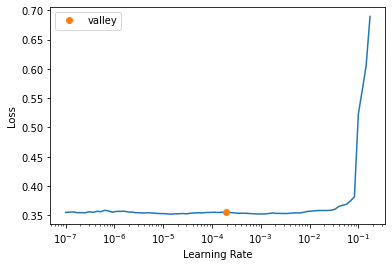

In [ ]:
#slow
learn.fit_flat_cos(1, 2e-4, cbs=EarlyStoppingCallback())

```
epoch	train_loss	valid_loss	time
0	      0.341366	0.374705	7:22:26
```

In [ ]:
#export
def train(dls, m, lr, loss_func, n_epochs=1, opt_func=ranger, validate=False):
    learn = TabularLearner(dls, m, loss_func=loss_func, opt_func=ranger)
    learn.fit_flat_cos(n_epochs, lr, cbs=EarlyStoppingCallback())
    
    if validate:
        learn.validate()
    
    return learn

def predict(learner, df_test):
    dl             = learn.dls.test_dl(df_test)
    probs, y_preds = learn.get_preds(dl=dl)
    
    return probs

In [ ]:
#slow
learn = train(dls, m, lr, loss_func=BCELossFlat(), n_epochs=1)